**Based on Zaccone: Python Parallel Programming Cookbook** 

### Thread communication using a queue 

* As discussed earlier, threading can be complicated when threads need to share data or resources. 

* As we saw, the Python threading module provides many synchronization primitives, 
including semaphores, condition variables, events, and locks. 

* While these options exist, queues are often much easier to deal with and make threaded programming considerably safer, as they 
effectively funnel all access to a resource of a single thread and allow a cleaner and more 
readable design pattern.

### The most imporant queue methods:
* put(): This puts an item in the queue
* get(): This removes and returns an item from the queue
* task_done(): This needs to be called each time an item has been processed
* join(): This blocks until all items have been processed

In this example, we will see how to **use the threading module with the queue module**. 

Also, we have a producer and three consumer **entities**  that try to **share a common resource, a queue**

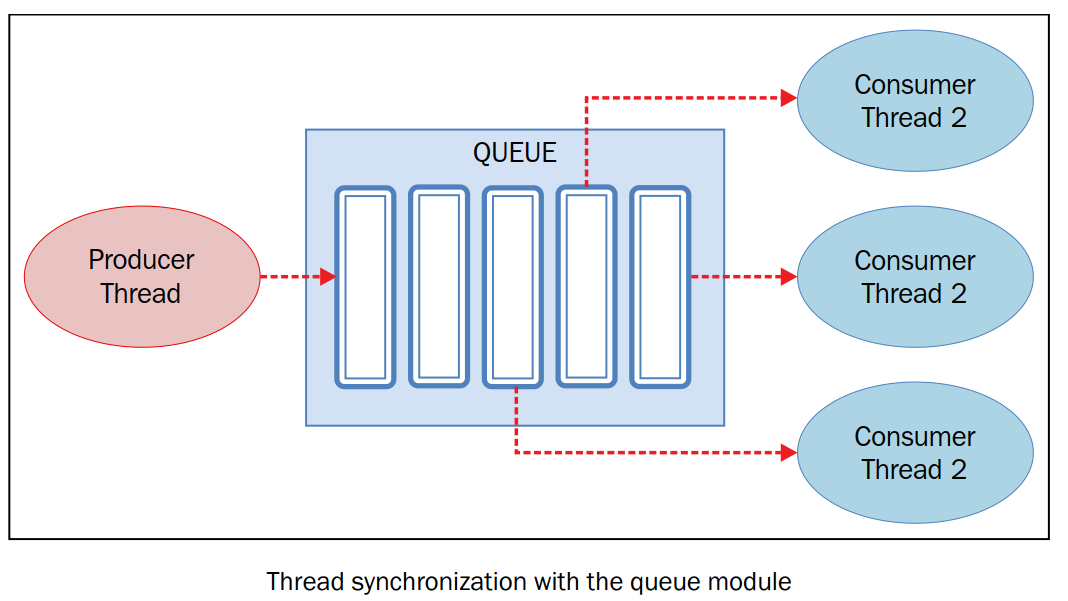

In [1]:
from threading import Thread, Event
from queue import Queue
import time
import random

In [2]:
class producer(Thread):
    def __init__(self, queue):
        Thread.__init__(self)
        
        # We don't need to pass the integers list because we use the queue to store the integers that are generated
        self.queue = queue
    
    
    #The thread in the producer class generates integers and puts them in the queue in a for loop 
    def run(self) :
        for i in range(10):
            item = random.randint(0, 256)
            # The queue method is thread safe and it can acquire the lock before inserting data in a queue
            self.queue.put(item) 
            print ('Producer notify : item number %d appended to queue by %s \n'% (item, self.name))
            time.sleep(1)    

In [3]:
class consumer(Thread):
    def __init__(self, queue):
        Thread.__init__(self)
        self.queue = queue
    
    def run(self):
        while True:
            #The thread gets the integer from the queue
            # Here we use the Queue.get([block[, timeout]]) method.
            # It acquires the lock before removing data from the queue. 
            # If the queue is empty, it puts the consumer in a waiting state.

            item = self.queue.get()
            print ('Consumer notify : %d popped from queue by %s'% (item, self.name))
            #The thread indicates that it is done working using task_done()
            self.queue.task_done()


In [4]:
queue = Queue()

# start one producer and three consumer threads
t1 = producer(queue)
t2 = consumer(queue)
t3 = consumer(queue)
t4 = consumer(queue)
t1.start()
t2.start()
t3.start()
t4.start()
t1.join()
t2.join()
t3.join()
t4.join()
         


Producer notify : item number 53 appended to queue by Thread-4 

Consumer notify : 53 popped from queue by Thread-5
Producer notify : item number 173 appended to queue by Thread-4 
Consumer notify : 173 popped from queue by Thread-5

Producer notify : item number 151 appended to queue by Thread-4 
Consumer notify : 151 popped from queue by Thread-6

Producer notify : item number 204 appended to queue by Thread-4 
Consumer notify : 204 popped from queue by Thread-7

Producer notify : item number 5 appended to queue by Thread-4 
Consumer notify : 5 popped from queue by Thread-5

Producer notify : item number 238 appended to queue by Thread-4 
Consumer notify : 238 popped from queue by Thread-6

Producer notify : item number 184 appended to queue by Thread-4 
Consumer notify : 184 popped from queue by Thread-7

Producer notify : item number 213 appended to queue by Thread-4 
Consumer notify : 213 popped from queue by Thread-5

Producer notify : item number 115 appended to queue by Thread-

KeyboardInterrupt: 